In [80]:
# Import required packages
import cv2
import pytesseract

# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = 'C:/Users/bandl/Desktop/Tesseract-OCR/tesseract.exe'

# Read image from which text needs to be extracted
img = cv2.imread('C:/Users/bandl/Desktop/Pic Repository/seismograph.jpeg')

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 20))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
												cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = img.copy()

# A text file is created and flushed
file = open("recognizedref.txt", "w+")
file.write("")
file.close()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
	x, y, w, h = cv2.boundingRect(cnt)
	
	# Drawing a rectangle on copied image
	rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
	
	# Cropping the text block for giving input to OCR
	cropped = im2[y:y + h, x:x + w]
	
	# Open the file in append mode
	file = open("recognizedref.txt", "a")
	
	# Apply OCR on the cropped image
	text = pytesseract.image_to_string(cropped)
	
	# Appending the text into file
	file.write(text)
	file.write("\n")
	
	# Close the file
	file.close


In [81]:
# Import required packages
import cv2
import pytesseract

# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = 'C:/Users/bandl/Desktop/Tesseract-OCR/tesseract.exe'

# Read image from which text needs to be extracted
img = cv2.imread("C:/Users/bandl/Gaussian Img.jpg")

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 18))
40
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
												cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = img.copy()

# A text file is created and flushed
file = open("recognizedAHE.txt", "w+")
file.write("")
file.close()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
	x, y, w, h = cv2.boundingRect(cnt)
	
	# Drawing a rectangle on copied image
	rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
	
	# Cropping the text block for giving input to OCR
	cropped = im2[y:y + h, x:x + w]
	
	# Open the file in append mode
	file = open("recognizedAHE.txt", "a")
	
	# Apply OCR on the cropped image
	text = pytesseract.image_to_string(cropped)
	
	# Appending the text into file
	file.write(text)
	file.write("\n")
	
	# Close the file
	file.close


In [82]:
from difflib import SequenceMatcher
text1 = open("C:/Users/bandl/recognizedref.txt").read()
text2 = open("C:/Users/bandl/recognizedAHE.txt").read()
m = SequenceMatcher(None, text1, text2)
z=m.ratio()
print(z*100)

57.04225352112676


In [1]:
!pip install pybind11
!pip install fastwer
!pip install pytesseract
!sudo apt install tesseract-ocr

You should consider upgrading via the 'C:\Users\bandl\anaconda3\python.exe -m pip install --upgrade pip' command.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fastwer: filename=fastwer-0.1.3-cp39-cp39-win_amd64.whl size=58866 sha256=7960cbe361d6ace00ff1b71432031b97d67300c0d930442983ac92c0672f4ce9
  Stored in directory: c:\users\bandl\appdata\local\pip\cache\wheels\2b\69\dd\8daec95853d65514fc28654423070ff5a227a52b6929caa2cf
Successfully built fastwer


You should consider upgrading via the 'C:\Users\bandl\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\bandl\anaconda3\python.exe -m pip install --upgrade pip' command.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import cv2
import pytesseract
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [83]:
# Define reference text and output text
ref = text1
output = text2

# Obtain Sentence-Level Character Error Rate (CER)
fastwer.score_sent(output, ref, char_level=True)

40.4339

In [2]:
# Define reference text and output text
ref = 'Hari is sleeping'
output = 'Harii iz sleping'

# Obtain Sentence-Level Character Error Rate (CER)
fastwer.score_sent(output, ref, char_level=True)

18.75

In [84]:
#Obtain Sentence-Level Word Error Rate (WER)
fastwer.score_sent(output, ref)

57.1429

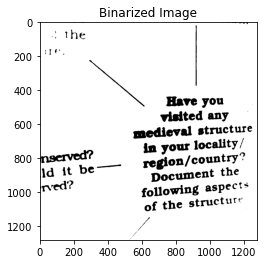

True

In [37]:
image_thres=cv2.imread('C:/Users/bandl/Desktop/Pic Repository/medieval.jpeg')
image_thres.shape
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
img_gray=rgb2gray(image_thres)
img_temp = np.ones((1280,1280), dtype=np.int16)
img_gray=img_temp*(img_gray > 76)
plt.figure(5)
plt.imshow(img_gray,cmap='gray')
plt.title("Binarized Image")
plt.show()
cv2.imwrite("Binary Img.jpg", img_gray)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("C:/Users/bandl/Cropped Image.jpg")
img.shape